Генерация красного шума

In [28]:
#some standard libraries
import numpy as np
import math
import matplotlib.pyplot as plt
#library for power-law red-noise generation
import colorednoise as cn
import scipy

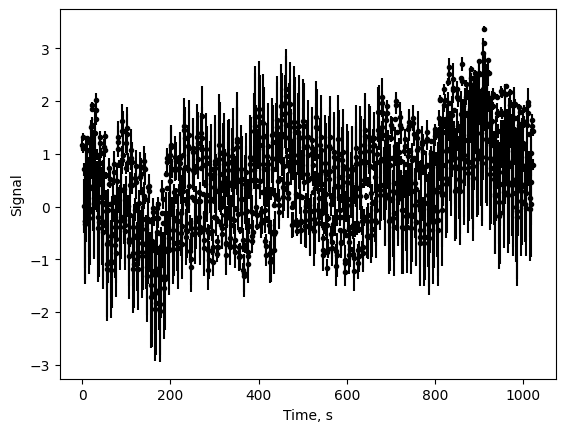

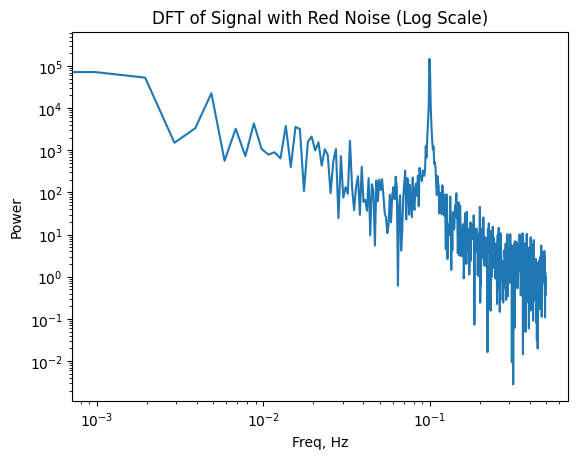

In [65]:
#generate the sine wave signal with the background correlated noise

N=1024 #number of elements in the list
f0=1/10. #frequency of periodic signal
A=1. #amplitude
phi0=np.random.uniform(0,1) # random phase

#slope of the power-law red noise in frequency domain
a=2

phi0=np.random.uniform(0,1)
time_list=np.arange(0, N, 1)
signal=A*np.sin(2*math.pi*f0*time_list+phi0)
color_noise=cn.powerlaw_psd_gaussian(a, N) #generating the colored noise here
err = 0.3 * np.abs(sig_obs)  # Ошибка составляет 30% от значения сигнала
sig_obs=signal+color_noise
plt.errorbar(time_list, sig_obs, err, c="black", fmt=".")
plt.xlabel("Time, s")
plt.ylabel("Signal")
plt.show()
#DFT
power_FT=abs(np.fft.fft(sig_obs))**2
freq_FT=np.fft.fftfreq(len(sig_obs), 1.)
plt.plot(freq_FT[0:int(N/2)], power_FT[0:int(N/2)])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Freq, Hz")
plt.title("FFT of Signal with Red Noise (Log Scale)")
plt.ylabel("Power")
plt.show()

PSD

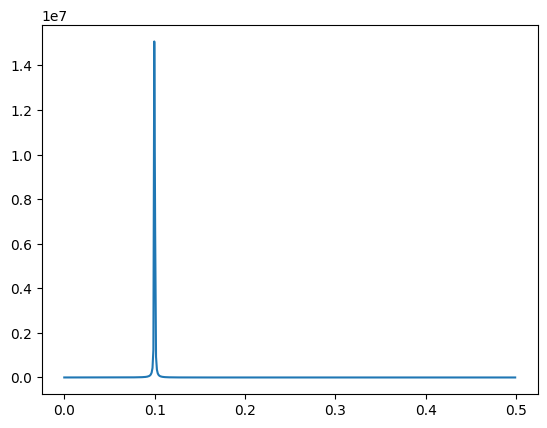

In [67]:
# Параметры сигнала
N = 1024  # Количество точек
f0 = 1/10  # Частота сигнала
A = 10  # Большая амплитуда
phi0 = np.random.uniform(0, 1)  # Случайная фаза

# Генерация временной оси
time_list = np.arange(0, N, 1)

# Генерация синусоидального сигнала с большой амплитудой
signal_large_amp = A * np.sin(2 * np.pi * f0 * time_list + phi0)

freq = np.fft.fftfreq(N, d=1)
psd = np.abs(np.fft.fft(signal_large_amp))**2
plt.plot(freq[0:int(len(psd)/2)], psd[0:int(len(psd)/2)])


Белый шум и Гауссов шум

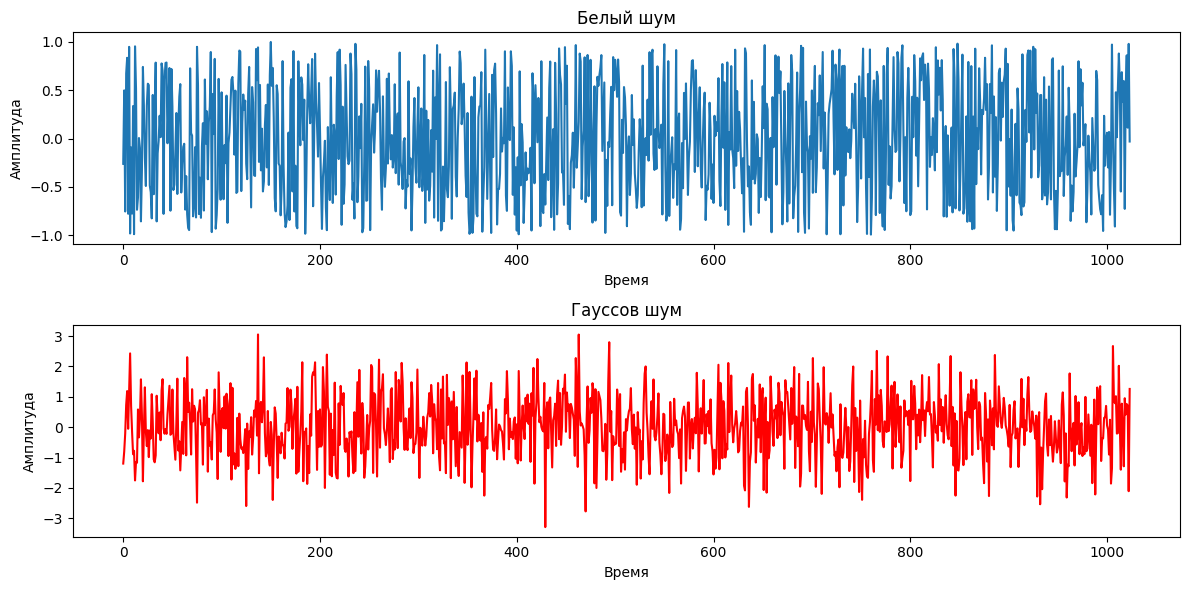

In [68]:
import numpy as np
import matplotlib.pyplot as plt


N = 1024

# Генерация равномерно распределенного белого шума
white_noise = np.random.uniform(-1, 1, N)

# Генерация Гауссова шума
mu = 0  # Среднее
sigma = 1  # Стандартное отклонение
gaussian_noise = np.random.normal(mu, sigma, N)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(white_noise)
plt.title('Белый шум')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(2, 1, 2)
plt.plot(gaussian_noise, color='r')
plt.title('Гауссов шум')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()

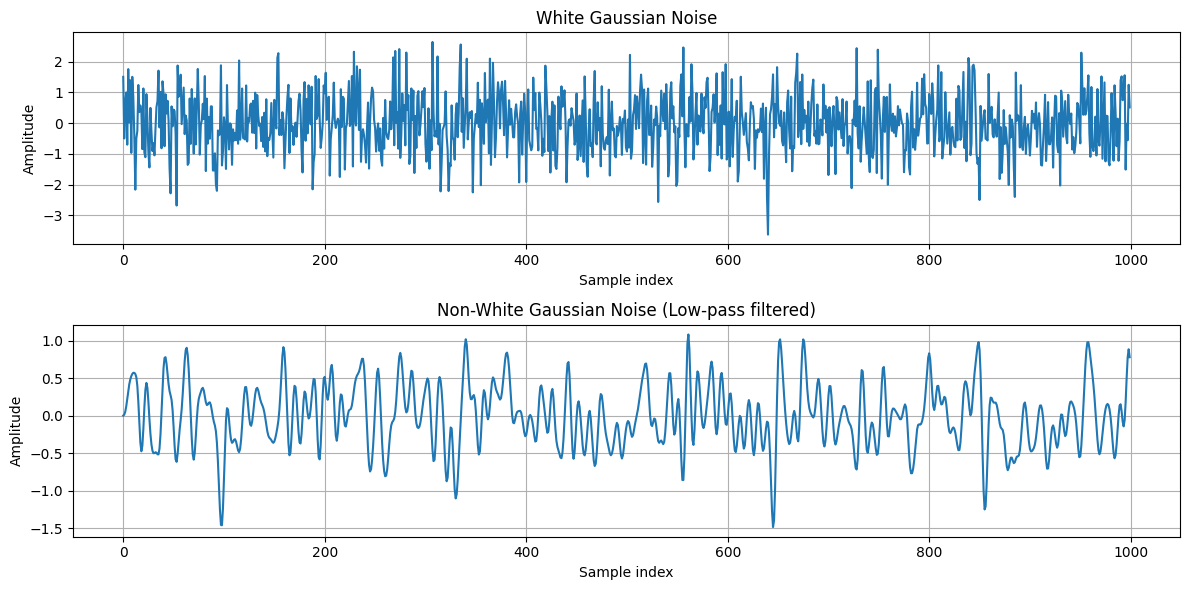

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Number of samples
N = 1000

# Generate white Gaussian noise 
mean = 0
std_dev = 1
wgn = np.random.normal(mean, std_dev, N)

# Create Non-White Gaussian Noise (NWGN) by filtering WGN
# Here we'll use a Butterworth low-pass filter
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = lfilter(b, a, data)
    return y

fs = 500  # Sample rate, just for the sake of defining a lowpass filter
cutoff = 50  # Cutoff frequency in Hz
nwgn = butter_lowpass_filter(wgn, cutoff, fs)

# Plotting
plt.figure(figsize=(12, 6))

# WGN plot
plt.subplot(2, 1, 1)
plt.plot(wgn)
plt.title("White Gaussian Noise")
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.grid(True)

# NWGN plot
plt.subplot(2, 1, 2)
plt.plot(nwgn)
plt.title("Non-White Gaussian Noise (Low-pass filtered)")
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()